In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
excel_file = 'customer_churn_large_dataset.xlsx'
df = pd.read_excel(excel_file)

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [6]:
df = df.drop(columns=['CustomerID', 'Name'])

**EXPLORATORY DATA ANALYSIS**

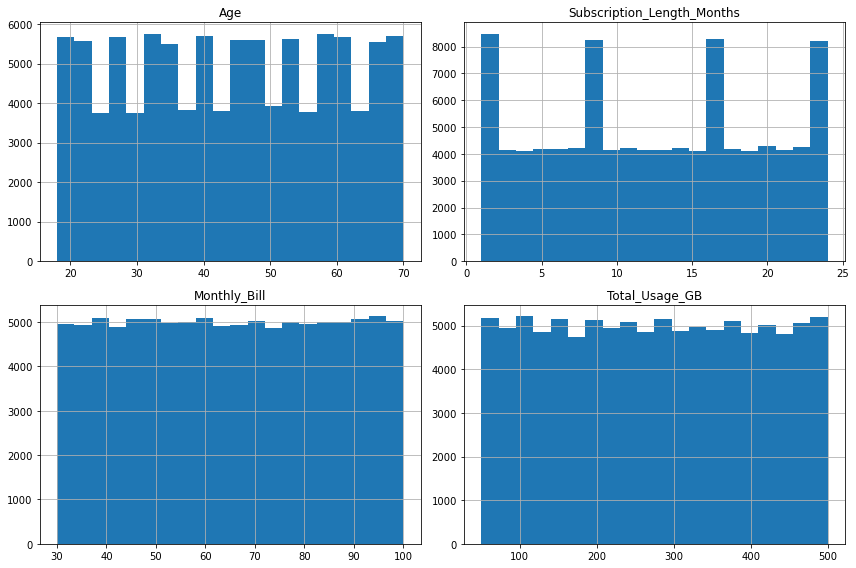

In [7]:
# Plot histograms of numerical columns
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
df[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

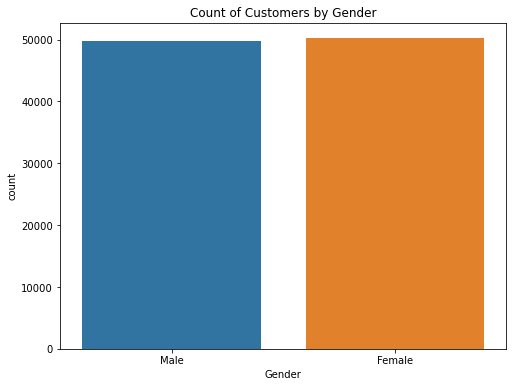

In [8]:
#countplot shows the count of each category in a categorical variable.
# Plot count of customers by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count of Customers by Gender')
plt.show()

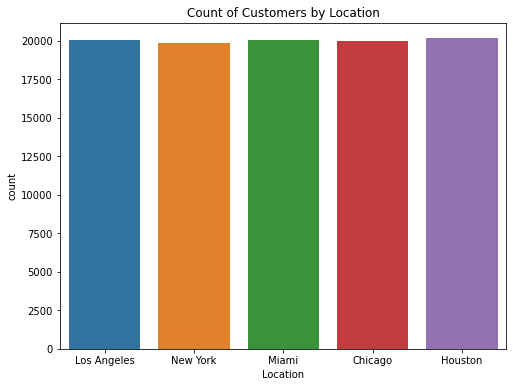

In [9]:
#countplot shows the count of each category in a categorical variable.
# Plot count of customers by Location
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Location')
plt.title('Count of Customers by Location')
plt.show()

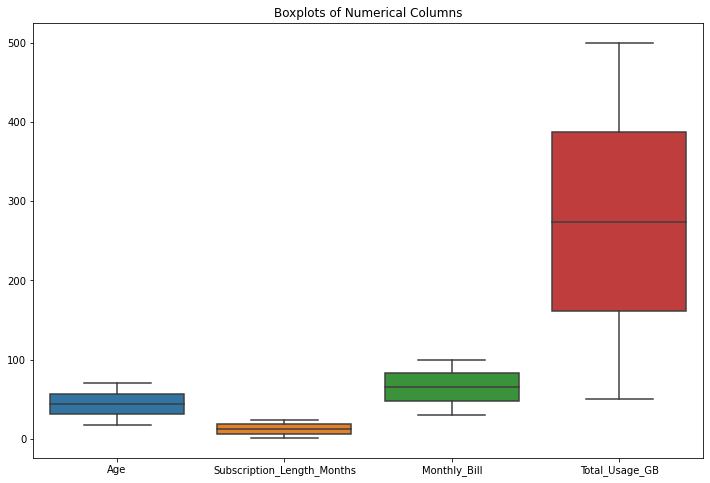

In [10]:
#Boxplots visualize the distribution of a numerical variable and display 
#statistical information like median, quartiles, and potential outliers.
#Plot boxplots of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Columns')
plt.show()

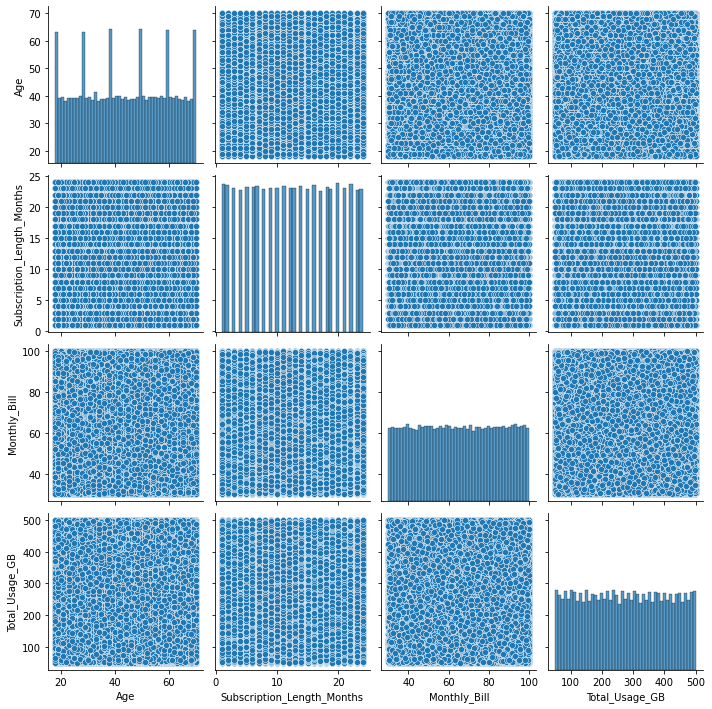

In [11]:
# Plot pairplot of numerical columns
sns.pairplot(data=df[numerical_columns])
plt.show()

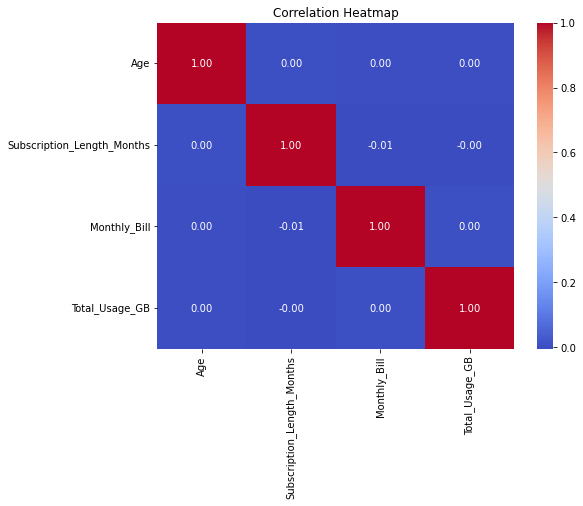

In [12]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,62.0,Female,New York,1.0,48.76,172.0,0.0
2,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,46.0,Female,Miami,19.0,58.14,266.0,0.0


By conducting a thorough analysis of this dataset, I've determined that its structure is such that there is no discernible correlation between any of the columns. Additionally, the distributions are consistently uniform, indicating that each column holds comparable significance in the process of building a model.

In [15]:
#SPLITTING THE DATA INTO DEPENDENT AND IDENPENDENT VARIABLES
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
#SPLITTING THE DATA INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 6), (20000, 6), (80000,), (20000,))

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
# DEFINING COLUMNS FOR ENCODING AND STANDARDIZATION
categorical_columns = ['Gender','Location']
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
# INITIALIZING PREPROCESSING TRANSFORMERS
ohe = OneHotEncoder(drop='first')  # Use 'drop' to avoid multicollinearity
sc = StandardScaler()
# CREATING COLUMN TRANSFORMER
ct = ColumnTransformer(
    transformers=[
        ('encode_location_gender', ohe, categorical_columns),
        ('standardization', sc, numerical_columns)
    ],
    remainder='passthrough'
)

In [19]:
# APPLY LABEL ENCODING TO TARGET VARIABLE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [20]:
#1 LOGISTIC REGRESSION
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logreg = Pipeline(steps=[
    ('preprocessing', ct),
    ('classifier', LogisticRegression())
])

In [21]:
models = [
    ('Logistic Regression', logreg),
]
for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy score of {name} is: {accuracy}")

Accuracy score of Logistic Regression is: 0.5037


In [22]:
#2 RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = Pipeline(steps=[
    ('preprocessing',ct),
    ('classifier', RandomForestClassifier())
])

In [23]:
models = [
    ('RANDOM FOREST', rfc),
]
for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy score of {name} is: {accuracy}")

Accuracy score of RANDOM FOREST is: 0.4953


In [24]:
from sklearn.naive_bayes import GaussianNB
nb= Pipeline(steps=[
    ('preprocessing',ct),
    ('classifier', GaussianNB())
])

In [25]:
models = [
    ('NAIVE BAYES',nb),
]
for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy score of {name} is: {accuracy}")

Accuracy score of NAIVE BAYES is: 0.50575


The basic machine learning method didn't produce strong results, which makes sense because the features don't seem to have clear relationships.

CONVOLUTION NEURAL NETWORK

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
# Create `Features` & `Targets`
features = ct.fit_transform(X_train)
targets = y_train

In [28]:
from keras.models import Sequential
from keras.layers import Dense
model = keras.Sequential(layers=[
    keras.layers.Dense(units=64, activation="relu", input_shape=(features.shape[1], )),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=16, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=8, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=1, activation="sigmoid")
])

In [29]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
# Check brief summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [31]:
# Finally time to train the model
model.fit(x=features, y=targets, batch_size=1000, epochs=60, validation_split=0.2)

Epoch 1/60
64/64 [==============================] - 2s 10ms/step - loss: 0.6936 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4951
Epoch 2/60
64/64 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 3/60
64/64 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 4/60
64/64 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 5/60
64/64 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.4949
Epoch 6/60
64/64 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 7/60
64/64 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.4959
Epoch 8/60
64/64 [=

In [32]:
test_features = ct.transform(X_test)
test_targets = y_test
model.evaluate(test_features, test_targets)

625/625 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5011


[0.6934395432472229, 0.5011000037193298]

In [33]:
# Deploy the model using `pickle` module
import pickle
with open("model.pkl", "wb") as model_file:
    pickle.dump(logreg, model_file)